# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
glioma_tumor = 'DATASET/TRAIN/glioma_tumor'
meningioma_tumor = 'DATASET/TRAIN/meningioma_tumor'
Neurocitoma_tumor = 'DATASET/TRAIN/Neurocitoma_tumor'
pituitary_tumor = 'DATASET/TRAIN/pituitary_tumor'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR glioma_tumor:

======== Images in:  DATASET/TRAIN/glioma_tumor
Images_count :	 350
Min_width :	 224
Max_width :	 554
Min_height :	 224
Max_height :	 554



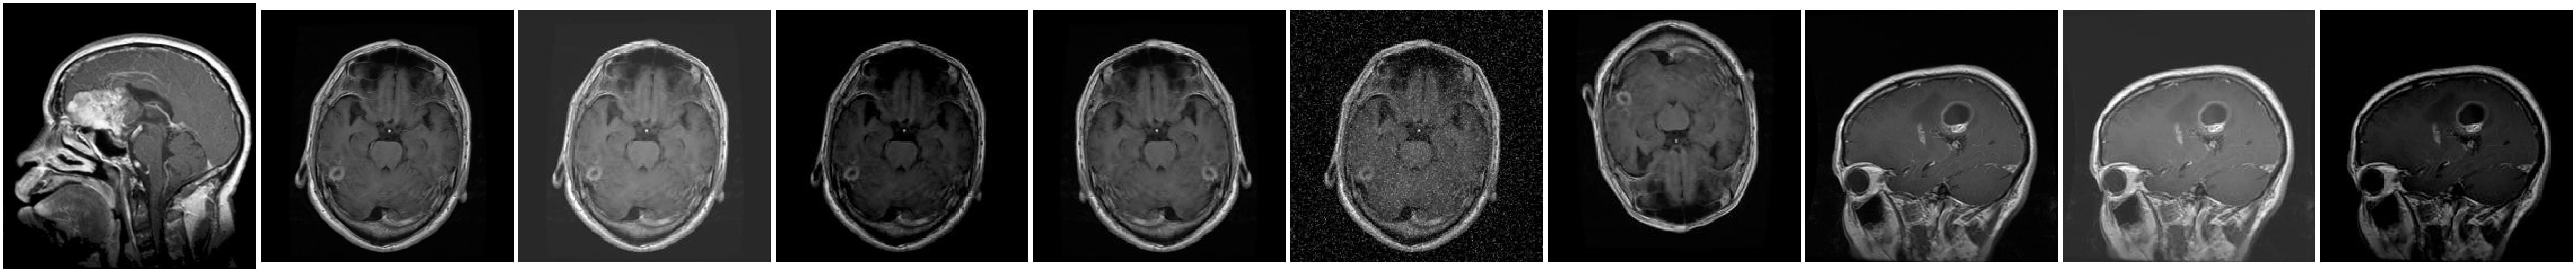

In [5]:
print("")
print("TRAINING DATA FOR glioma_tumor:")
print("")
images_details(glioma_tumor)
print("")
plot_images(glioma_tumor, 10) 


TRAINING DATA FOR meningioma_tumor:

======== Images in:  DATASET/TRAIN/meningioma_tumor
Images_count :	 350
Min_width :	 200
Max_width :	 512
Min_height :	 219
Max_height :	 512



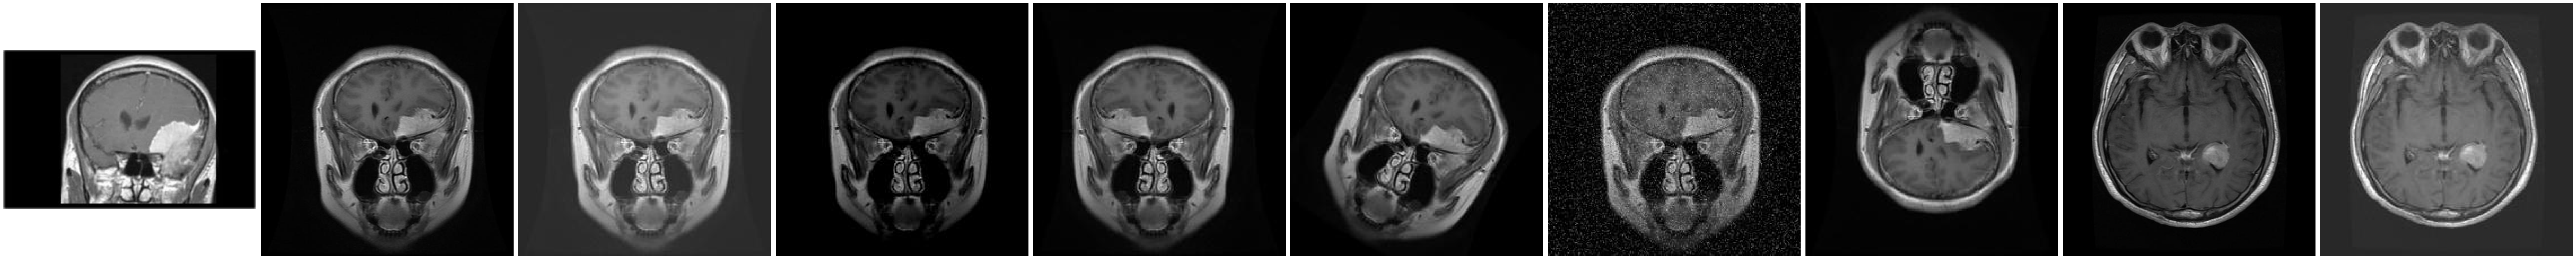

In [6]:
print("")
print("TRAINING DATA FOR meningioma_tumor:")
print("")
images_details(meningioma_tumor)
print("")
plot_images(meningioma_tumor, 10)


TRAINING DATA FOR Neurocitoma_tumor:

======== Images in:  DATASET/TRAIN/Neurocitoma_tumor
Images_count :	 350
Min_width :	 447
Max_width :	 630
Min_height :	 517
Max_height :	 630



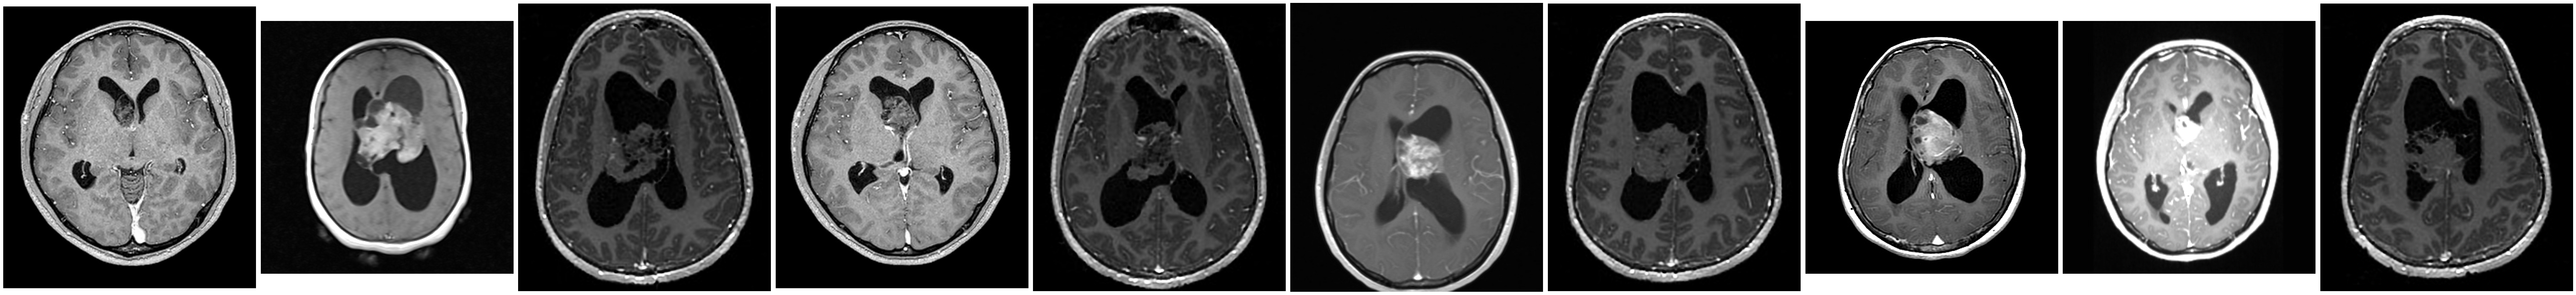

In [7]:
print("")
print("TRAINING DATA FOR Neurocitoma_tumor:")
print("")
images_details(Neurocitoma_tumor)
print("")
plot_images(Neurocitoma_tumor, 10)


TRAINING DATA FOR pituitary_tumor:

======== Images in:  DATASET/TRAIN/pituitary_tumor
Images_count :	 350
Min_width :	 224
Max_width :	 512
Min_height :	 224
Max_height :	 512



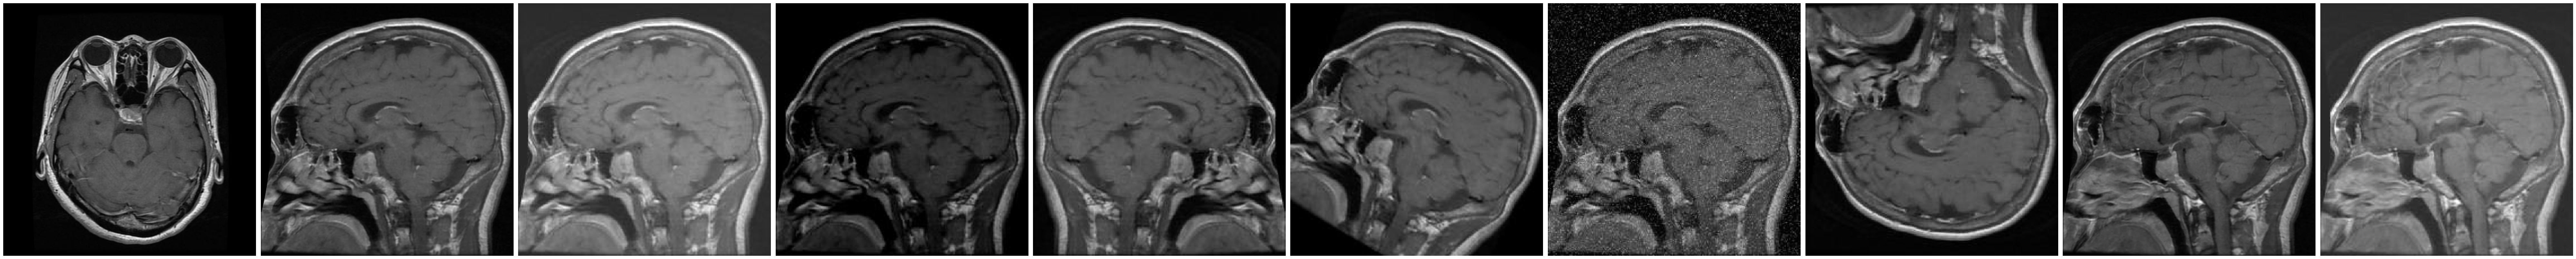

In [8]:
print("")
print("TRAINING DATA FOR pituitary_tumor:")
print("")
images_details(pituitary_tumor)
print("")
plot_images(pituitary_tumor, 10)

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('DATASET/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2100 images belonging to 6 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('DATASET/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2100 images belonging to 6 classes.


In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(6, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [13]:
epochs = 10
batch_size = 512

In [14]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


4/4 [==============================] - ETA: 0s - loss: 19.4302 - accuracy: 0.1797
Epoch 1: accuracy improved from -inf to 0.17969, saving model to MANUAL.h5
4/4 [==============================] - 4s 924ms/step - loss: 19.4302 - accuracy: 0.1797 - val_loss: 10.3782 - val_accuracy: 0.1641
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 7.4164 - accuracy: 0.1953
Epoch 2: accuracy improved from 0.17969 to 0.19531, saving model to MANUAL.h5
4/4 [==============================] - 3s 833ms/step - loss: 7.4164 - accuracy: 0.1953 - val_loss: 5.1115 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 4.1670 - accuracy: 0.2031
Epoch 3: accuracy improved from 0.19531 to 0.20312, saving model to MANUAL.h5
4/4 [==============================] - 3s 809ms/step - loss: 4.1670 - accuracy: 0.2031 - val_loss: 3.1270 - val_accuracy: 0.1797
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 1.9799 - accuracy: 0.2672
Epoch 4: 

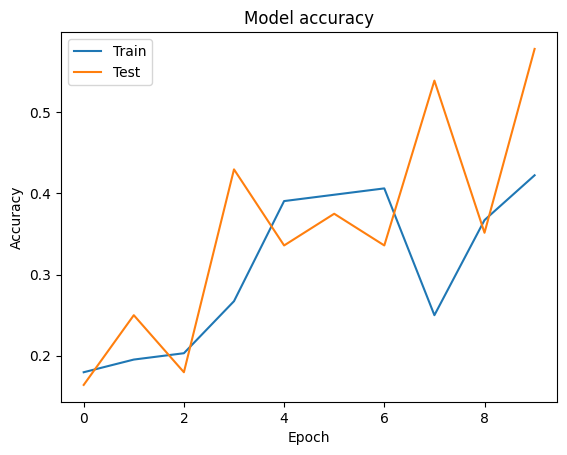

In [15]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

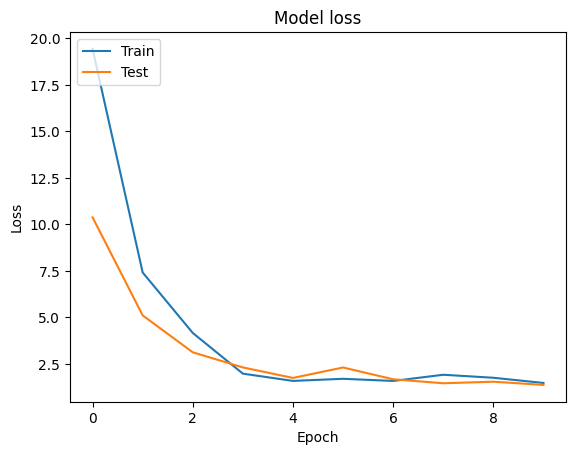

In [16]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()